<a href="https://colab.research.google.com/github/Muluken1Walle/ProjectLinearRegression/blob/main/ProjectLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)


In [219]:
SeoulBikeData=pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv')


#What are the factors that influence the number of bikes rented?


In [220]:
SeoulBikeData.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [221]:

#Explore the data for outliers and missing values
MisV=SeoulBikeData.isna().sum()
MisV

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [222]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [223]:
SeoulBikeData.corr=SeoulBikeData.corr()
SeoulBikeData.corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [224]:
SeoulBikeData.corr =SeoulBikeData.corr['Temperature(C)']
SeoulBikeData.corr

Rented Bike Count           0.538558
Hour                        0.124114
Temperature(C)              1.000000
Humidity(%)                 0.159371
Wind speed (m/s)           -0.036252
Visibility (10m)            0.034794
Dew point temperature(C)    0.912798
Solar Radiation (MJ/m2)     0.353505
Rainfall(mm)                0.050282
Snowfall (cm)              -0.218405
Name: Temperature(C), dtype: float64

In [225]:
from datetime import date
SeoulBikeData['Date'] = pd.to_datetime(SeoulBikeData['Date'])
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

In [226]:
SeoulBikeData.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [227]:
SeoulBikeData.Seasons.value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [228]:
SeoulBikeData['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [229]:
from  sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
SeoulBikeData['Seasons'] = le.fit_transform(SeoulBikeData['Seasons'])
SeoulBikeData['Holiday'] = le.fit_transform(SeoulBikeData['Holiday'])
SeoulBikeData['Functioning Day'] = le.fit_transform(SeoulBikeData['Functioning Day'])



In [230]:
SeoulBikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   int64         
 12  Holiday             

In [231]:
SeoulBikeData.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

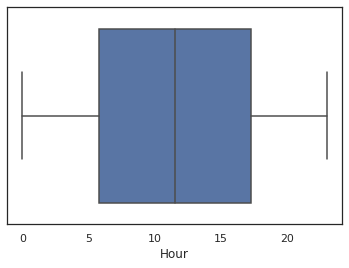

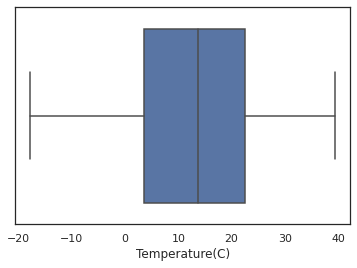

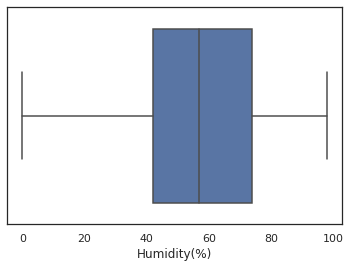

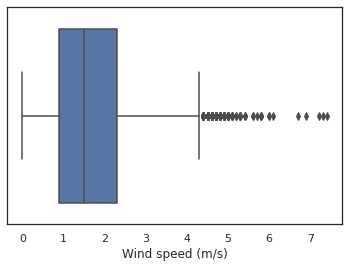

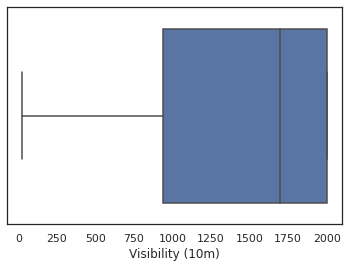

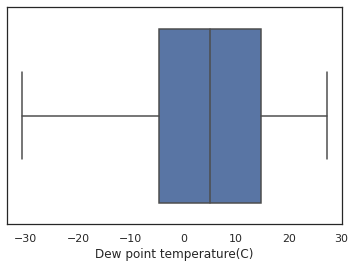

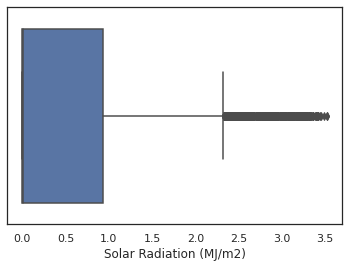

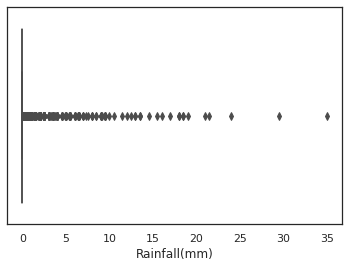

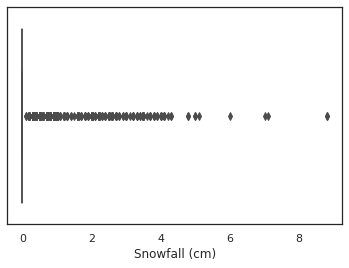

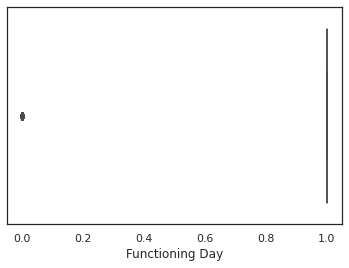

In [232]:
cols = ['Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day']
for col in cols:
  plt.figure()
  sns.boxplot(SeoulBikeData[col])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


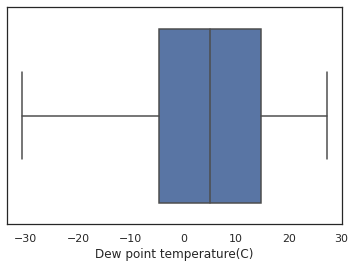

In [233]:
import seaborn as sns
sns.boxplot(SeoulBikeData['Dew point temperature(C)'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


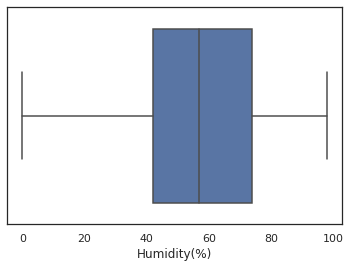

In [234]:
sns.boxplot(SeoulBikeData['Humidity(%)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


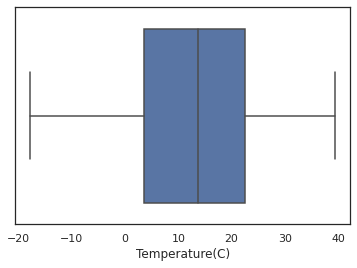

In [235]:
sns.boxplot(SeoulBikeData['Temperature(C)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


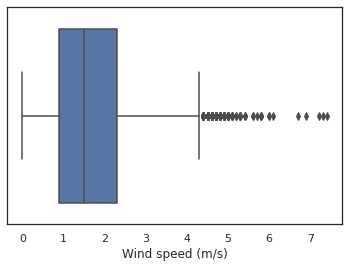

In [236]:
sns.boxplot(SeoulBikeData['Wind speed (m/s)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


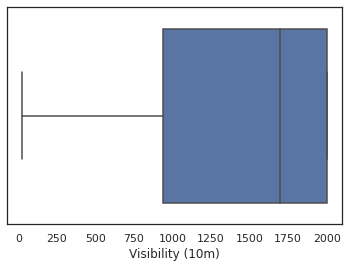

In [237]:
sns.boxplot(SeoulBikeData['Visibility (10m)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


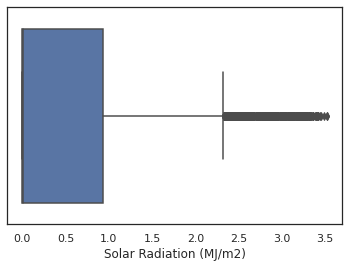

In [238]:
sns.boxplot(SeoulBikeData['Solar Radiation (MJ/m2)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


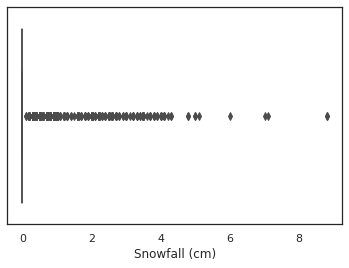

In [239]:
sns.boxplot(SeoulBikeData['Snowfall (cm)'])

In [240]:
SeoulBikeData.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,1.495890,0.950685,0.966324
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.114408,0.216537,0.180404
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,2.000000,1.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,3.000000,1.000000,1.000000


In [241]:
Q1 = np.percentile(SeoulBikeData['Wind speed (m/s)'],25,interpolation='midpoint')
Q2 = np.percentile(SeoulBikeData['Wind speed (m/s)'],50,interpolation='midpoint')
Q3 = np.percentile(SeoulBikeData['Wind speed (m/s)'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('lower limit',low_lim)
print('upper limit',up_lim)

lower limit -1.1999999999999997
upper limit 4.3999999999999995


In [242]:
SeoulBikeData = SeoulBikeData[SeoulBikeData['Wind speed (m/s)'] < up_lim]

In [243]:
S1 = np.percentile(SeoulBikeData['Solar Radiation (MJ/m2)'],25,interpolation='midpoint')
S2 = np.percentile(SeoulBikeData['Solar Radiation (MJ/m2)'],50,interpolation='midpoint')
S3 = np.percentile(SeoulBikeData['Solar Radiation (MJ/m2)'],75,interpolation='midpoint')
IQR = S3 - S1
low_lim = S1 - 1.5 * IQR
up_lim = S3 + 1.5 * IQR
print('lower limit',low_lim)
print('upper limit',up_lim)

lower limit -1.35
upper limit 2.25


In [244]:
SeoulBikeData = SeoulBikeData[SeoulBikeData['Solar Radiation (MJ/m2)'] < up_lim]
SeoulBikeData

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1


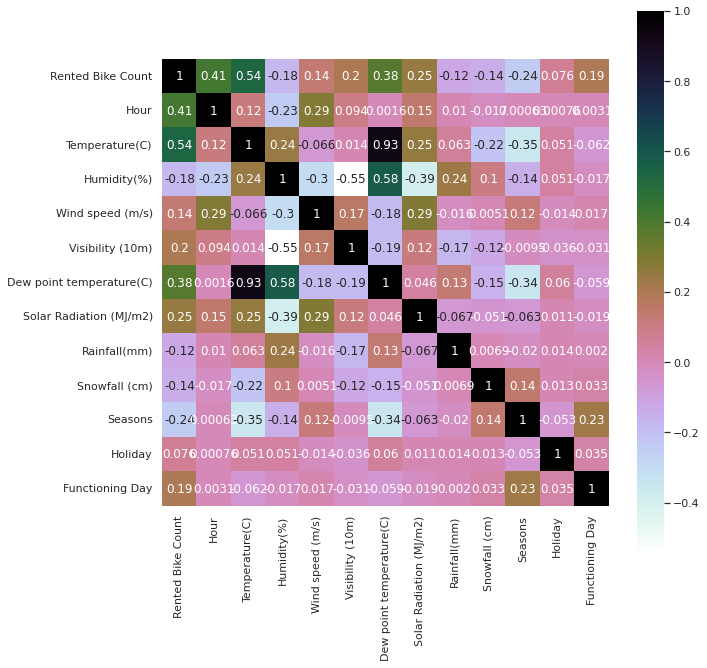

In [245]:
data_corr = SeoulBikeData.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_corr, annot=True, cmap='cubehelix_r',square=True) 
plt.show()

In [246]:
data_corr = data_corr['Rented Bike Count'][:-1]
data_corr[abs(data_corr)>=0.10].sort_values(ascending=False)

Rented Bike Count           1.000000
Temperature(C)              0.537780
Hour                        0.414797
Dew point temperature(C)    0.382032
Solar Radiation (MJ/m2)     0.246138
Visibility (10m)            0.196567
Wind speed (m/s)            0.135288
Rainfall(mm)               -0.120803
Snowfall (cm)              -0.137473
Humidity(%)                -0.176562
Seasons                    -0.243095
Name: Rented Bike Count, dtype: float64

In [255]:
SeoulBikeData.drop('Date',axis = 1,inplace = True)

In [256]:
df_train = SeoulBikeData
df_test = SeoulBikeData.drop('Rented Bike Count',axis = 1)

In [257]:
df_train.shape

(7908, 13)

In [258]:
df_test.shape

(7908, 12)

In [259]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_train, test_size=0.25)
df_test

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
6526,74,22,24.3,97,2.1,1028,23.7,0.00,4.5,0.0,2,1,1
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,3,1,1
8243,0,11,13.3,59,4.1,1970,5.4,1.43,0.0,0.0,0,1,0
3502,1382,22,15.2,35,1.2,1999,-0.1,0.00,0.0,0.0,1,1,1
463,213,7,-8.1,67,0.9,1737,-13.1,0.00,0.0,2.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,1047,0,21.1,69,0.5,1086,15.1,0.00,0.0,0.0,2,1,1
1063,59,7,-4.4,80,1.4,411,-7.3,0.00,0.0,0.0,3,1,1
3033,719,9,6.9,83,2.2,1666,4.2,0.83,0.0,0.0,1,1,1
4265,2307,17,23.5,32,3.2,1925,0.0,1.01,0.0,0.0,1,1,1


In [260]:
df_train

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8372,1269,20,10.5,52,1.4,1153,1.0,0.00,0.0,0.0,0,1,1
3535,1129,7,10.1,63,0.7,1163,3.3,0.22,0.0,0.0,1,1,1
2484,813,12,19.9,44,2.7,1874,7.2,2.22,0.0,0.0,1,1,1
4051,1751,19,17.0,76,1.5,2000,12.7,0.29,0.0,0.0,1,1,1
4920,849,0,22.0,81,1.6,374,18.5,0.00,0.0,0.0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,2055,21,22.7,66,0.9,1069,16.0,0.00,0.0,0.0,2,1,1
2502,10,6,14.4,96,0.7,453,13.7,0.00,8.0,0.0,1,1,1
5258,648,2,19.3,54,1.4,2000,9.7,0.00,0.0,0.0,2,1,1
6464,328,8,21.3,97,1.3,1029,20.7,0.17,0.5,0.0,2,1,1


In [261]:
df_trainx =df_train.drop(['Rented Bike Count'], axis = 1)
df_trainy =df_train['Rented Bike Count']             # output of the training data

df_testx=df_test.drop(['Rented Bike Count'], axis = 1)
df_testy =df_test['Rented Bike Count'] 

In [262]:
print('Dimension of df_trainx dataframe:',df_trainx.shape)
print('Dimension ofdf_trainy dataframe:',df_trainy.shape)
print('Dimension ofdf_testx dataframe:',df_testx.shape)
print('Dimension of df_testy dataframe:',df_testy.shape)

Dimension of df_trainx dataframe: (5931, 12)
Dimension ofdf_trainy dataframe: (5931,)
Dimension ofdf_testx dataframe: (1977, 12)
Dimension of df_testy dataframe: (1977,)


In [263]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(df_trainx, df_trainy)

LinearRegression()

In [264]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(df_testx)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, df_testy))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, df_testy))
print('R_Squared Score of linear regression:', r2_score(df_pred, df_testy))

Mean Absolute Error of linear regression: 332.2997599872853
Mean Square Error of linear regression: 193054.4147803627
R_Squared Score of linear regression: 0.17379439742575253


In [266]:
from sklearn.linear_model import Ridge #Ridge

ridge = Ridge()
ridge

Ridge()

In [267]:
ridge.fit(df_trainx,df_trainy)
ridge_score = ridge.score(df_testx,df_testy)
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

array([ 2.61372184e+01,  1.72276256e+01, -1.07992955e+01,  2.86054411e+01,
        3.42518007e-02,  1.43692811e+01, -4.39929196e+01, -5.27227681e+01,
        3.56309613e+01, -8.66198063e+01,  1.32615720e+02,  9.21128867e+02])

In [268]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5572149041333989
number of feature used: 12


In [269]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso()

In [270]:
lasso.fit(df_trainx,df_trainy)
lasso_score = lasso.score(df_testx,df_testy)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.054e+05, tolerance: 2.559e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


array([ 2.62043740e+01,  1.72300713e+01, -1.06667216e+01,  2.65307208e+01,
        3.50829704e-02,  1.42423150e+01, -3.84284726e+01, -5.21239442e+01,
        3.04241868e+01, -8.44638613e+01,  1.12932387e+02,  8.96052895e+02])

In [271]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5566425278137199
number of feature used: 12
